# Importing Libraries

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Test set Image Processing

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\asush\OneDrive\Documents\DATASET\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid_demo",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 1387 files belonging to 3 classes.
['Corn_(maize)___Common_rust_', 'Potato___Early_blight', 'Tomato___Bacterial_spot']


# Loading Model

In [12]:
cnn = tf.keras.models.load_model(r"C:\Users\asush\Downloads\trained_plant_disease_model.keras")

#Visualising and Performing Prediction on Single image

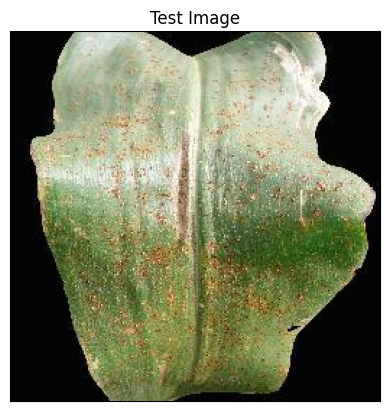

In [14]:
#Test Image Visualization
import cv2
image_path = r"C:\Users\asush\OneDrive\Documents\DATASET\test\test\CornCommonRust2.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [15]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


In [16]:
print(predictions)

[[0.24465933 0.29543725 0.45990342]]


In [18]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


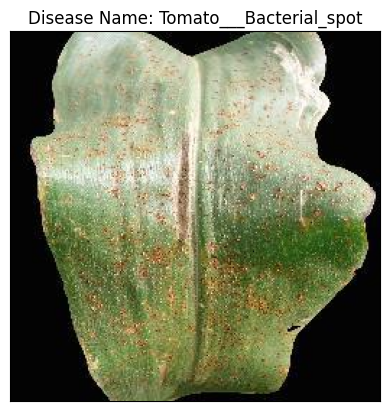

In [19]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()